In [839]:
!python --version
!python -m pip install --upgrade pip
!python -m pip install matplotlib pandas graphviz

Python 3.11.9


In [840]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dérivées

In [841]:
def f(x):
    return 3*x**2 - 4*x +5

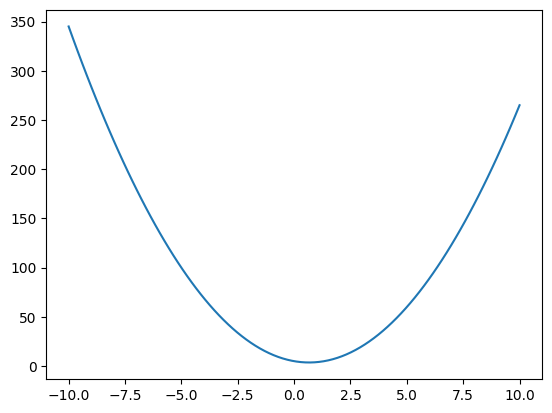

In [842]:
X = np.linspace(-10, 10, 100)
Y = f(X)
plt.plot(X, Y)

In [843]:
x = 1
h = 0.000000000000001
(f(x + h) - f(x)) / h

1.7763568394002502

Exemple plus parlant

In [844]:
x = 2 # entrée
w = -3 # poids
b = 1 # biais
y = w*x + b # sortie

print(y)

-5


In [845]:
h = 0.000000000000001

y1 = y
y2 = w*(x + h) + b
print(f"y1 = {y1}")
print(f"y2 = {y2}")

y1 = -5
y2 = -5.000000000000003


In [846]:
print(f'slope: {(y2 - y1) / h}')

slope: -2.6645352591003757


In [847]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = _children
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f'Value(data = {self.data})'

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        
        out._backward = _backward
        return out 
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad

        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1
        for node in reversed(topo):
            node._backward()

In [848]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

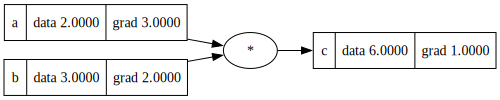

In [849]:
draw_dot(c)

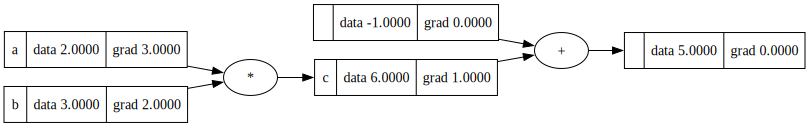

In [850]:
d = Value(-1)
e = d+c
draw_dot(e)

In [851]:
a = Value(3, label="a")
b = Value(1, label="b")
c = Value(5, label="c")

d = a * b; d.label = "d"

e = d + c; e.label = "e"

f = Value(-4, label="f")

L = d * f; L.label = "L"

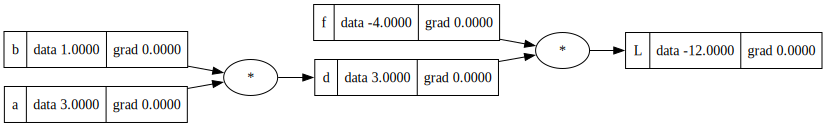

In [852]:
draw_dot(L)

In [853]:
# def lol():
#     a = Value(2, label = 'a')
#     b = Value(3, label='b')
#     c = Value(5, label='c')
#     e = a * b; e.label = 'a*b'
#     d = e + c; d.label = 'a*b+c'
#     f = Value(-2, label='f')
#     L1 = d * f; L.label = 'L'
#     h = 0.0001
#     a = Value(2-h, label = 'a')
#     b = Value(3, label='b')
#     c = Value(5, label='c')
#     e = a * b; e.label = 'a*b'
#     d = e + c; d.label = 'a*b+c'
#     f = Value(-2+h, label='f')
#     L2 = d * f; L.label = 'L'
#     print(((L2.data) - L1.data)/h)

def lol():
    w = Value(2, label="w")
    x = Value(3, label="x")
    b = Value(5, label="b")
    wx = w * x; wx.label = "wx"
    f_x = wx + b; f_x.label = "f_x"

    h = 0.00001

    w = Value(2, label="w")
    x = Value(3, label="x")
    b = Value(5, label="b")
    wx = w * x; wx.label = "wx"
    f_x_h = wx + b; f_x.label = "f_x_h"

    print((f_x_h.data - f_x.data) / h)

In [854]:
lol()

0.0


In [855]:
# test de l'implem de backward dans Value

#input
x1 = Value(1, label='x1')
x2 = Value(-2, label='x2')

#weights
w1 = Value(3, label='w1')
w2 = Value(-1, label='w2')
b = Value(1, label='b')

w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1_w2x2 = w1x1 + w2x2; w1x1_w2x2.label = 'w1*x1 + w2*x2'
n = w1x1_w2x2 + b; n.label = 'n'

In [856]:
# y = n.tanh(); y.label = 'y'
# draw_dot(y)

In [857]:
# y.grad = 1
# y._backward()
# print(n.grad)
# draw_dot(y)

In [858]:
topo = [
]

visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(n)

topo

[Value(data = 3),
 Value(data = 1),
 Value(data = 3),
 Value(data = -1),
 Value(data = -2),
 Value(data = 2),
 Value(data = 5),
 Value(data = 1),
 Value(data = 6)]

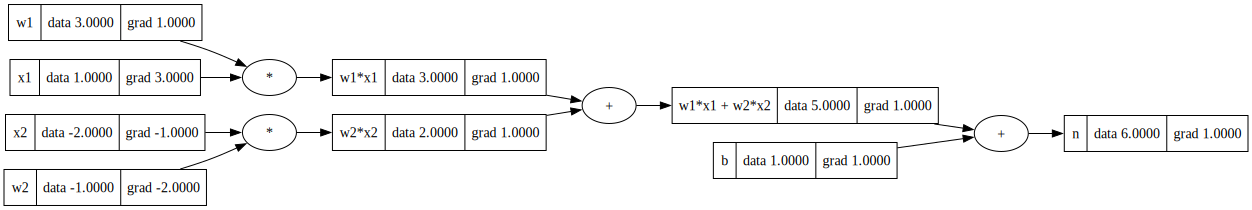

In [859]:
n.grad = 1
for node in reversed(topo):
    node._backward()

draw_dot(n)

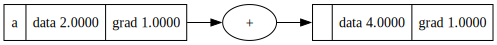

In [860]:
a = Value(2, label="a")

b = a+a
b.backward()
draw_dot(b)

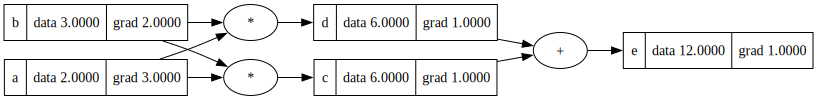

In [861]:
a = Value(2, label="a")
b = Value(3, label="b")
c = a*b; c.label = "c"
d = a*b; d.label = "d"
e = c + d; e.label = "e"

e.backward()
draw_dot(e)

l'exemple final

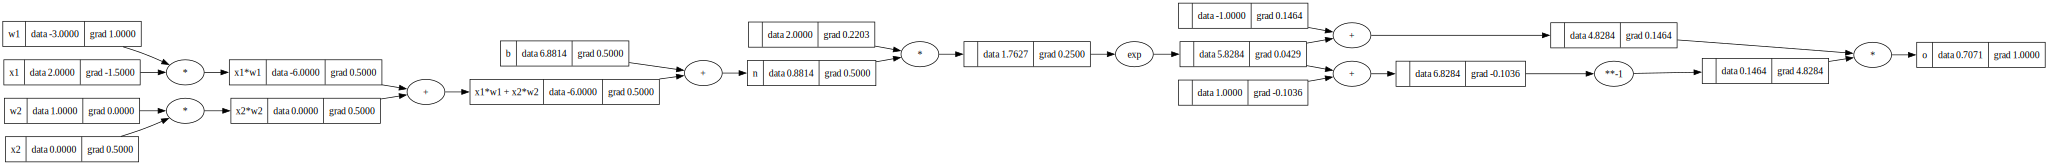

In [862]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)
  
  def __rsub__(self, other): # other - self
    return other + (-self)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [863]:
import random

class Perceptron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        agg = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = agg.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]


n = Perceptron(3)
X = [1, 2, 3]
y = n(X)
y

Value(data=-0.5338946274569165)

In [864]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Perceptron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]

    def parameters(self):
        return [p for perceptron in self.neurons for p in perceptron.parameters()]

In [865]:
X = [1, 2, 3]
layer = Layer(3, 5)
print(layer(X))

[Value(data=0.9180251599977328), Value(data=0.7865697927453983), Value(data=-0.9972928852832523), Value(data=0.9266837032909636), Value(data=0.7253949094001626)]


In [866]:
class MLP:
    def __init__(self, nin, nouts):
        size_layers = [nin] + nouts
        self.layers = [Layer(size_layers[i], size_layers[i+1]) for i in range(len(size_layers) - 1)]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [867]:
x = [1, 2, 3]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.8490523505695198)

In [868]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [869]:
# Forward pass

ypred = [n(x) for x in xs]
loss = sum((ygt - yout)**2 for ygt, yout in zip(ys, ypred))

# Backward pass

for p in n.parameters():
    p.grad = 0

loss.backward()

# Update

for p in n.parameters():
    p.data -= 0.1 * p.grad

print(loss)

Value(data=5.631817050527038)


In [870]:
# Itérer
for k in range(20):
    ypred = [n(x) for x in xs]
    loss = sum((ygt - yout)**2 for ygt, yout in zip(ys, ypred))

    # Backward pass

    for p in n.parameters():
        p.grad = 0

    loss.backward()

    # Update

    for p in n.parameters():
        p.data -= 0.1 * p.grad

    print(k, loss)

0 Value(data=1.4698403909640323)
1 Value(data=1.5975614397851765)
2 Value(data=2.9092363089604474)
3 Value(data=0.7212134181255916)
4 Value(data=0.18361827578111853)
5 Value(data=0.031719894139902546)
6 Value(data=0.02682282447081416)
7 Value(data=0.023352918356691087)
8 Value(data=0.02073774019364364)
9 Value(data=0.0186844223752207)
10 Value(data=0.017023682184062576)
11 Value(data=0.015649542784038864)
12 Value(data=0.014491757520307765)
13 Value(data=0.013501696542161865)
14 Value(data=0.012644516225783551)
15 Value(data=0.011894539660237836)
16 Value(data=0.011232395952089136)
17 Value(data=0.010643177216646668)
18 Value(data=0.010115211365168011)
19 Value(data=0.009639221683039045)


In [871]:
ypred

[Value(data=0.9582964395804479),
 Value(data=-0.9710507035843545),
 Value(data=-0.9456300885966291),
 Value(data=0.9359228144937646)]